<font size="4"><strong>ESTUDIANTE:</strong> Ivan Ulloa<br><strong>ASIGNATURA:</strong> Estadística para las Ciencias de la Computación</font>

# Método de Análisis

<font size="3"><strong>Tema:</strong> Salud Covid19 con Análisis multivariante (Ciencia de Datos aplicada)<br><strong>Objetivo:</strong> Descubrir concocimiento (los principales factores que influyen en el COVID 19)<br><strong>Dataset:</strong> COVID19_clasificacion (https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/LQDFSE)<br><strong>Tipo de Problema de Aprendizaje: </strong>Regresión, clustering <br><strong>Medida de calidad: </strong>Correlación de variables, tiempo de ejecución, relación entre grupos</font>

## Carga del Dataset

In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import axes3d

df = pd.read_csv('COVID19_clasificacion.csv', sep=";")  

df = df.drop('Number', axis=1)
listCol = list(df.columns)
df.head()

,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Astheniay,Leukopenia,Exposure to Covid-19 patients,High risk zone,Temp,Blood Test,RT-PCR,History,Decision label
0,80,Male,Yes,Yes,Yes,*,*,*,*,*,*,*,*,*,*,*,COVID-19
1,62,Male,Yes,*,Yes,Yes,97,"0,75",Yes,*,*,*,*,*,*,*,COVID-19
2,57,Male,Yes,*,Yes,Yes,*,*,*,*,Yes,*,*,*,*,*,COVID-19
3,45,Male,Yes,*,Yes,Yes,*,*,*,Yes,Yes,*,*,*,*,*,COVID-19
4,63,Male,Yes,*,Yes,Yes,*,*,*,Yes,Yes,*,*,*,*,*,COVID-19


## Procesamiento del Dataset

<font size="4">Se reemplaza los datos vacios ("*") con el valor que mas se repite. No existe ruido en el dataset</font>

In [2]:
modeAge = df['Age'].value_counts()[:2].index.tolist()[0]
modePO2 = df['PO2'].value_counts()[:2].index.tolist()[1]
modeCRP = df['CRP'].value_counts()[:2].index.tolist()[1]
modeTemp = df['Temp'].value_counts()[:2].index.tolist()[1]

#Replace values
df['Age'] = df['Age'].replace({'*': modeAge})
df['PO2'] = df['PO2'].replace({'*': modePO2})
df['CRP'] = df['CRP'].replace({'*': modeCRP})
df['Temp'] = df['Temp'].replace({'*': modeTemp})
df['Temp'] = df['Temp'].fillna(modeTemp);


In [4]:
val_cat = listCol

#TRANSFORMACION usando StandarScaler
preprocesador1 = make_column_transformer(
    (OrdinalEncoder(),val_cat)
    )

base = preprocesador1.fit_transform(df)
nombres1=val_cat

DatasetPreprocesado = pd.DataFrame(data=base,columns=nombres1)
numero_componentes=5

#DatasetPreprocesado.to_csv('COVID19_procesado.csv')
DatasetPreprocesado

,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Astheniay,Leukopenia,Exposure to Covid-19 patients,High risk zone,Temp,Blood Test,RT-PCR,History,Decision label
0,46.0,2.0,2.0,2.0,2.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
1,29.0,2.0,2.0,0.0,2.0,2.0,15.0,0.0,2.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
2,25.0,2.0,2.0,0.0,2.0,2.0,13.0,0.0,0.0,0.0,3.0,0.0,25.0,0.0,0.0,0.0,0.0
3,13.0,2.0,2.0,0.0,2.0,2.0,13.0,0.0,0.0,1.0,3.0,0.0,25.0,0.0,0.0,0.0,0.0
4,30.0,2.0,2.0,0.0,2.0,2.0,13.0,0.0,0.0,1.0,3.0,0.0,25.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,29.0,1.0,1.0,0.0,1.0,2.0,13.0,0.0,1.0,0.0,1.0,1.0,20.0,0.0,0.0,0.0,1.0
126,30.0,2.0,2.0,0.0,1.0,2.0,13.0,0.0,1.0,0.0,1.0,1.0,22.0,0.0,0.0,0.0,1.0
127,30.0,1.0,2.0,0.0,1.0,2.0,13.0,0.0,1.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0
128,10.0,1.0,1.0,0.0,1.0,1.0,13.0,0.0,1.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0


## Estadísticas Descriptivas 

In [138]:
#Media
med = DatasetPreprocesado.median(0)
med

Age                              28.0
Gender                            1.0
Fever                             2.0
Dyspnea                           0.0
Nasal                             1.0
Cough                             2.0
PO2                              13.0
CRP                               2.0
Astheniay                         1.0
Leukopenia                        0.0
Exposure to Covid-19 patients     1.0
High risk zone                    1.0
Temp                             25.0
Blood Test                        0.0
RT-PCR                            0.0
History                           0.0
Decision label                    0.0
dtype: float64

In [139]:
#Desviacion estandar
des = DatasetPreprocesado.std()
des

Age                              13.511990
Gender                            0.640931
Fever                             0.694986
Dyspnea                           0.881804
Nasal                             0.720308
Cough                             0.865457
PO2                               2.701001
CRP                               0.215112
Astheniay                         0.676904
Leukopenia                        0.173360
Exposure to Covid-19 patients     0.866800
High risk zone                    0.501399
Temp                              7.485072
Blood Test                        0.195507
RT-PCR                            0.087706
History                           2.036694
Decision label                    0.501399
dtype: float64

In [140]:
#Varianza
vr = DatasetPreprocesado.var()
vr

Age                              182.573882
Gender                             0.410793
Fever                              0.483005
Dyspnea                            0.777579
Nasal                              0.518843
Cough                              0.749016
PO2                                7.295408
CRP                                0.046273
Astheniay                          0.458199
Leukopenia                         0.030054
Exposure to Covid-19 patients      0.751342
High risk zone                     0.251401
Temp                              56.026297
Blood Test                         0.038223
RT-PCR                             0.007692
History                            4.148122
Decision label                     0.251401
dtype: float64

In [141]:
#Análisis descriptivo
DatasetPreprocesado.describe()  

,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Astheniay,Leukopenia,Exposure to Covid-19 patients,High risk zone,Temp,Blood Test,RT-PCR,History,Decision label
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,28.276923,1.392308,1.538462,0.538462,0.823077,1.253846,12.261538,1.984615,0.661538,0.030769,0.846154,0.523077,19.792308,0.023077,0.007692,0.661538,0.476923
std,13.511990,0.640931,0.694986,0.881804,0.720308,0.865457,2.701001,0.215112,0.676904,0.173360,0.866800,0.501399,7.485072,0.195507,0.087706,2.036694,0.501399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.250000,1.000000,1.000000,0.000000,0.000000,0.000000,13.000000,2.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,0.000000,1.000000,2.000000,13.000000,2.000000,1.000000,0.000000,1.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000
75%,38.750000,2.000000,2.000000,2.000000,1.000000,2.000000,13.000000,2.000000,1.000000,0.000000,1.000000,1.000000,25.000000,0.000000,0.000000,0.000000,1.000000
max,52.000000,2.000000,2.000000,2.000000,2.000000,2.000000,16.000000,3.000000,2.000000,1.000000,3.000000,1.000000,29.000000,2.000000,1.000000,8.000000,1.000000


### Correlaciones entre variables

In [142]:
#CORRELACION ENTRE VARIABLES
cr=DatasetPreprocesado.corr()
cr

,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Astheniay,Leukopenia,Exposure to Covid-19 patients,High risk zone,Temp,Blood Test,RT-PCR,History,Decision label
Age,1.000000,0.109989,-0.064706,0.086931,0.008259,-0.059090,-0.032586,-0.019859,-0.114262,-0.175752,-0.080392,-0.083334,-0.000730,-0.055258,-0.080307,-0.084735,-0.047106
Gender,0.109989,1.000000,0.009371,0.021101,0.067552,-0.027198,0.025352,-0.068336,0.040409,0.099820,-0.057960,-0.136939,0.088213,-0.010945,-0.054100,0.155953,-0.056037
Fever,-0.064706,0.009371,1.000000,-0.021406,0.052411,0.170519,0.089581,-0.047864,0.209145,0.118783,-0.093047,0.075294,0.120017,-0.149213,-0.195656,-0.007162,0.102674
Dyspnea,0.086931,0.021101,-0.021406,1.000000,-0.288214,-0.332858,-0.228832,0.125745,-0.445556,0.093618,-0.174753,-0.571843,0.388208,0.017294,-0.053971,0.205855,-0.585330
Nasal,0.008259,0.067552,0.052411,-0.288214,1.000000,0.159647,0.271003,-0.117762,0.194210,0.168090,0.216798,0.301155,-0.180841,-0.135923,-0.100996,-0.268348,0.321298
Cough,-0.059090,-0.027198,0.170519,-0.332858,0.159647,1.000000,0.186931,-0.062138,0.306584,0.154207,0.186797,0.370474,-0.207196,0.010925,0.076202,-0.201556,0.397682
PO2,-0.032586,0.025352,0.089581,-0.228832,0.271003,0.186931,1.000000,0.060347,0.252308,0.048902,0.080229,0.235918,-0.135328,0.032522,0.024165,0.040172,0.262072
CRP,-0.019859,-0.068336,-0.047864,0.125745,-0.117762,-0.062138,0.060347,1.000000,-0.036038,0.012792,0.070357,0.075190,-0.050145,0.008507,0.006321,0.023410,0.068555
Astheniay,-0.114262,0.040409,0.209145,-0.445556,0.194210,0.306584,0.252308,-0.036038,1.000000,-0.174803,-0.063010,0.525675,-0.430138,-0.116251,-0.086379,-0.139966,0.616333
Leukopenia,-0.175752,0.099820,0.118783,0.093618,0.168090,0.154207,0.048902,0.012792,-0.174803,1.000000,0.341270,-0.186596,0.124443,-0.021112,-0.015687,-0.058097,-0.170132


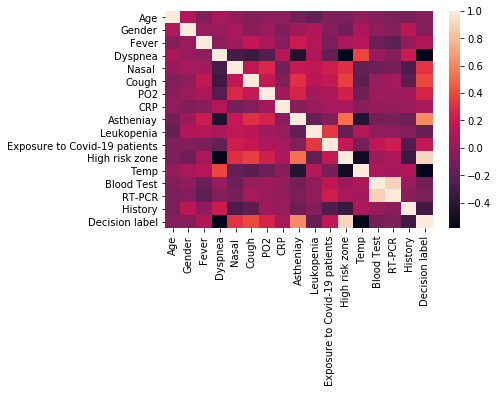

In [143]:
#MAPA DE CALOR DE LAS CORRELACIONES
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# plot heatmap
ax = sns.heatmap(cr.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

## Proceso de Clustering

In [5]:
import math
from scipy import sparse
from sklearn.preprocessing import StandardScaler
x=DatasetPreprocesado
x = sparse.csr_matrix(x)
x = StandardScaler(with_mean=False).fit_transform(x)
#print(x)
print("Se han estandarizado los datos")
x.shape

Se han estandarizado los datos


(130, 17)

### Reducción del dimensionalidad con PCA

In [6]:
from sklearn.decomposition import PCA

num_components=2
pca = PCA(num_components)
principalComponents = pca.fit_transform(DatasetPreprocesado)
principalComponents

num_components=principalComponents.shape[1]
explained_variance_ratio_=pca.explained_variance_ratio_
explained_variance_ratio_

print(explained_variance_ratio_.sum())  

a = range(num_components)
num_pc= a[::1]

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['A1', 'A2'])

0.9389154781095173


In [7]:
import time
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

X=principalDf
ejecucion=[]
K_range=range(2,17,1)
distortions=[]

for i in K_range:
    start_time = time.time()
    kmeanModel = KMeans(n_clusters=i,init='k-means++')
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0])
    ejecucion.append(time.time() - start_time)

print('Kmeans terminado')  

Kmeans terminado


## Estadística descriptiva para el Clustering 

### Determinando el número indicado de grupos

Text(0.5, 1.0, 'Seleccionando con el metodo del codo')

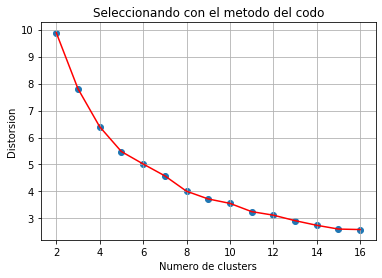

In [8]:
plt.grid(True)
plt.scatter(K_range, distortions)
plt.plot(K_range, distortions, color='red')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsion')
plt.title('Seleccionando con el metodo del codo')

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

cent=0
k = 5

def descubrirK(X, nclust, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full'):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = descubrirK(principalDf, int(k), init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full' )
kmeans = pd.DataFrame(clust_labels,columns=['Grupos'])
print('Usuarios agrupados')

Usuarios agrupados


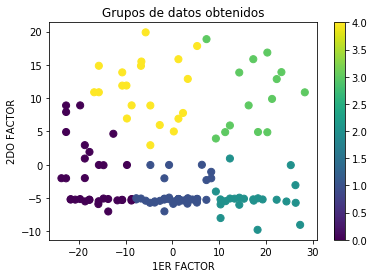

In [10]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDf['A1'], principalDf['A2'],c=kmeans['Grupos'], s=50)
ax.set_title('Grupos de datos obtenidos')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
plt.colorbar(scatter)

### Gráfica de tiempo de ejecución 

Text(0, 0.5, 'Tiempo de ejecucion - segundos')

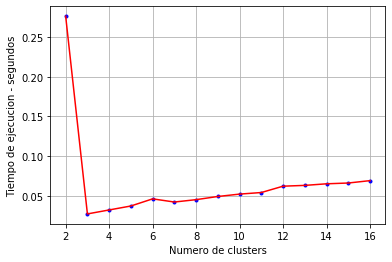

In [10]:
plt.grid(True)
plt.plot(K_range, ejecucion , 'b.')
plt.plot(K_range, ejecucion, color='red')
plt.xlabel('Numero de clusters')
plt.ylabel('Tiempo de ejecucion - segundos')

### Visualización del los grupos

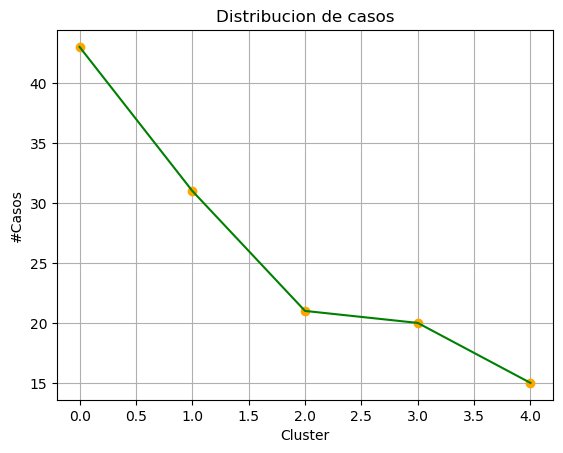

In [23]:
def doKmeans(X, nclust=5):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

#Sin Reducir Dimensionalidad
clust_labels, cent = doKmeans(DatasetPreprocesado, 5)
kmeans = pd.DataFrame(clust_labels, columns=['Grupos'])

UserGrupoK=kmeans.groupby(kmeans.Grupos).Grupos.count()

UserGrupoK=UserGrupoK.sort_values(ascending=False, inplace=False, kind='quicksort')

grupo=UserGrupoK.index.tolist()
valores=UserGrupoK.values.tolist()

plt.grid(True)
plt.plot(range(len(grupo)), valores,'bo', color='orange')
plt.plot(range(len(grupo)), valores, color='green')
plt.title("Distribucion de casos")
plt.xlabel("Cluster")
plt.ylabel("#Casos")
plt.show()

In [24]:
DataClustering = DatasetPreprocesado
DataClustering['Groups'] = clust_labels

DataClustering[DataClustering['Groups']==0.0]

,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Astheniay,Leukopenia,Exposure to Covid-19 patients,High risk zone,Temp,Blood Test,RT-PCR,History,Decision label,Groups
1,29.0,2.0,2.0,0.0,2.0,2.0,15.0,0.0,2.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0
2,25.0,2.0,2.0,0.0,2.0,2.0,13.0,0.0,0.0,0.0,3.0,0.0,25.0,0.0,0.0,0.0,0.0,0
4,30.0,2.0,2.0,0.0,2.0,2.0,13.0,0.0,0.0,1.0,3.0,0.0,25.0,0.0,0.0,0.0,0.0,0
7,33.0,0.0,2.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0
9,27.0,2.0,2.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,0
10,23.0,0.0,2.0,0.0,2.0,0.0,13.0,0.0,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,0
15,27.0,0.0,2.0,0.0,0.0,2.0,13.0,0.0,0.0,0.0,1.0,0.0,25.0,0.0,0.0,0.0,0.0,0
17,27.0,0.0,2.0,2.0,0.0,2.0,13.0,0.0,0.0,0.0,1.0,0.0,25.0,0.0,0.0,4.0,0.0,0
18,27.0,0.0,2.0,2.0,0.0,2.0,13.0,3.0,2.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0
25,23.0,1.0,1.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0,3.0,0.0,25.0,0.0,0.0,1.0,0.0,0


In [16]:
DataClustering[DataClustering['Groups']==1.0]

,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Astheniay,Leukopenia,Exposure to Covid-19 patients,High risk zone,Temp,Blood Test,RT-PCR,History,Decision label,Groups
0,46.0,2.0,2.0,2.0,2.0,0.0,13.0,3.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,1
8,39.0,1.0,2.0,2.0,0.0,0.0,13.0,3.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,1
16,46.0,2.0,2.0,2.0,0.0,2.0,13.0,3.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,1
19,41.0,2.0,2.0,0.0,2.0,2.0,13.0,2.0,2.0,0.0,0.0,0.0,15.0,0.0,0.0,8.0,0.0,1
20,37.0,2.0,2.0,0.0,0.0,2.0,15.0,3.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,5.0,0.0,1
23,44.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,1
24,37.0,1.0,1.0,2.0,0.0,0.0,15.0,3.0,0.0,0.0,1.0,0.0,25.0,0.0,0.0,0.0,0.0,1
35,42.0,2.0,0.0,0.0,0.0,0.0,13.0,3.0,0.0,0.0,3.0,0.0,25.0,0.0,0.0,0.0,0.0,1
36,50.0,2.0,2.0,2.0,2.0,2.0,13.0,3.0,0.0,0.0,3.0,0.0,25.0,0.0,0.0,0.0,0.0,1
40,39.0,2.0,2.0,2.0,2.0,0.0,13.0,3.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,1


In [35]:
DataClustering[DataClustering['Groups']==2.0]

,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Astheniay,Leukopenia,Exposure to Covid-19 patients,High risk zone,Temp,Blood Test,RT-PCR,History,Decision label,Groups
1,29.0,2.0,2.0,0.0,2.0,2.0,15.0,0.0,2.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,2
2,25.0,2.0,2.0,0.0,2.0,2.0,13.0,2.0,0.0,0.0,3.0,0.0,25.0,0.0,0.0,0.0,0.0,2
4,30.0,2.0,2.0,0.0,2.0,2.0,13.0,2.0,0.0,1.0,3.0,0.0,25.0,0.0,0.0,0.0,0.0,2
7,33.0,0.0,2.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,2
9,27.0,2.0,2.0,0.0,0.0,0.0,13.0,2.0,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,2
10,23.0,0.0,2.0,0.0,2.0,0.0,13.0,2.0,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,2
15,27.0,0.0,2.0,0.0,0.0,2.0,13.0,2.0,0.0,0.0,1.0,0.0,25.0,0.0,0.0,0.0,0.0,2
17,27.0,0.0,2.0,2.0,0.0,2.0,13.0,2.0,0.0,0.0,1.0,0.0,25.0,0.0,0.0,4.0,0.0,2
18,27.0,0.0,2.0,2.0,0.0,2.0,13.0,3.0,2.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,2
25,23.0,1.0,1.0,2.0,0.0,0.0,6.0,2.0,0.0,0.0,3.0,0.0,25.0,0.0,0.0,1.0,0.0,2


In [17]:
DataClustering[DataClustering['Groups']==3.0]

,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Astheniay,Leukopenia,Exposure to Covid-19 patients,High risk zone,Temp,Blood Test,RT-PCR,History,Decision label,Groups
11,26.0,2.0,0.0,0.0,0.0,2.0,13.0,3.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,3
12,28.0,1.0,2.0,0.0,1.0,0.0,16.0,3.0,2.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,3
21,35.0,1.0,0.0,0.0,0.0,0.0,14.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,8.0,0.0,3
37,38.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,3
76,34.0,2.0,1.0,0.0,1.0,2.0,13.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3
79,45.0,1.0,1.0,0.0,1.0,1.0,13.0,3.0,1.0,0.0,1.0,1.0,9.0,0.0,0.0,0.0,1.0,3
80,44.0,1.0,1.0,0.0,1.0,1.0,13.0,3.0,1.0,0.0,1.0,1.0,9.0,0.0,0.0,0.0,1.0,3
81,23.0,1.0,1.0,0.0,1.0,1.0,13.0,3.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,3
87,27.0,2.0,2.0,0.0,1.0,2.0,13.0,3.0,1.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,3
92,25.0,1.0,1.0,0.0,1.0,2.0,13.0,3.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,1.0,3


In [126]:
DataClustering[DataClustering['Groups']==4.0]

,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Astheniay,Leukopenia,Exposure to Covid-19 patients,High risk zone,Temp,Blood Test,RT-PCR,History,Decision label,Groups
70,10.0,1.0,2.0,0.0,1.0,2.0,13.0,3.0,1.0,0.0,1.0,1.0,15.0,0.0,0.0,0.0,1.0,4
73,19.0,1.0,1.0,0.0,1.0,2.0,13.0,3.0,1.0,0.0,1.0,1.0,16.0,0.0,0.0,0.0,1.0,4
75,16.0,1.0,1.0,0.0,1.0,1.0,13.0,3.0,1.0,0.0,1.0,1.0,14.0,0.0,0.0,0.0,1.0,4
77,14.0,1.0,1.0,0.0,1.0,1.0,13.0,3.0,1.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,4
78,8.0,2.0,2.0,0.0,1.0,1.0,13.0,3.0,1.0,0.0,1.0,1.0,15.0,0.0,0.0,0.0,1.0,4
88,8.0,1.0,1.0,0.0,2.0,1.0,13.0,3.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,4
95,12.0,1.0,2.0,0.0,2.0,2.0,13.0,3.0,1.0,0.0,1.0,1.0,11.0,0.0,0.0,0.0,1.0,4
97,21.0,1.0,1.0,0.0,1.0,1.0,13.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4
100,0.0,1.0,2.0,0.0,1.0,2.0,13.0,3.0,1.0,0.0,1.0,1.0,9.0,0.0,0.0,0.0,1.0,4
102,6.0,1.0,2.0,0.0,1.0,2.0,13.0,3.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,1.0,4


In [25]:
auxDf = DataClustering[DataClustering['Groups']==0.0]
g1cov = auxDf[auxDf['Decision label']==0.0]['Decision label'].count()
g1flu = auxDf[auxDf['Decision label']==1.0]['Decision label'].count()

auxDf = DataClustering[DataClustering['Groups']==1.0]
g2cov = auxDf[auxDf['Decision label']==0.0]['Decision label'].count()
g2flu = auxDf[auxDf['Decision label']==1.0]['Decision label'].count()

auxDf = DataClustering[DataClustering['Groups']==2.0]
g3cov = auxDf[auxDf['Decision label']==0.0]['Decision label'].count()
g3flu = auxDf[auxDf['Decision label']==1.0]['Decision label'].count()

auxDf = DataClustering[DataClustering['Groups']==3.0]
g4cov = auxDf[auxDf['Decision label']==0.0]['Decision label'].count()
g4flu = auxDf[auxDf['Decision label']==1.0]['Decision label'].count()

auxDf = DataClustering[DataClustering['Groups']==4.0]
g5cov = auxDf[auxDf['Decision label']==0.0]['Decision label'].count()
g5flu = auxDf[auxDf['Decision label']==1.0]['Decision label'].count()

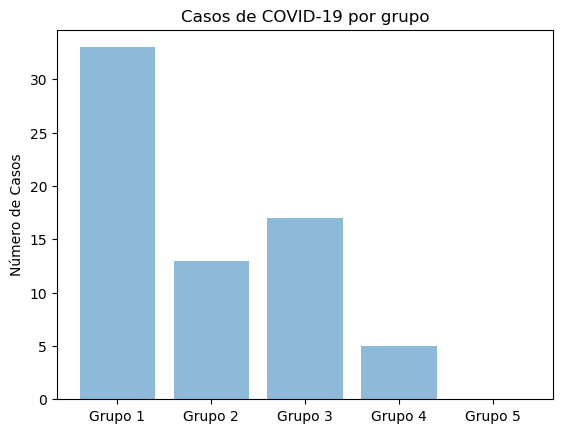

In [26]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5')
y_pos = np.arange(len(objects))
absolute_error = [g1cov, g2cov, g3cov, g4cov, g5cov]

plt.bar(y_pos, absolute_error, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Número de Casos')
plt.title('Casos de COVID-19 por grupo')

plt.show()

In [48]:
auxDf = DataClustering[DataClustering['Groups']==3.0]

g1fev = auxDf['Fever'].value_counts()
g1dys = auxDf['Dyspnea'].value_counts()
g1cou = auxDf['Cough'].value_counts()
g1ast = auxDf['Astheniay'].value_counts()
g1leu = auxDf['Leukopenia'].value_counts()
g1leu

0.0    20
Name: Leukopenia, dtype: int64

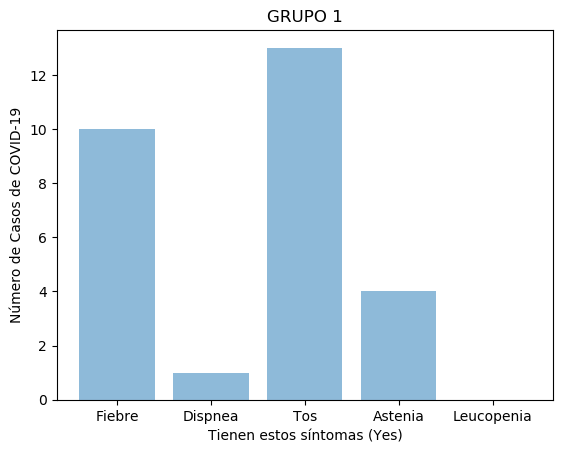

In [52]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Fiebre', 'Dispnea', 'Tos', 'Astenia', 'Leucopenia')
y_pos = np.arange(len(objects))
casos = [g1fev[2], g1dys[2], g1cou[2], g1ast[2], 0]

plt.bar(y_pos, casos, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Número de Casos de COVID-19')
plt.xlabel('Tienen estos síntomas (Yes)')
plt.title('GRUPO 1')

plt.show()

In [55]:
auxDf = DataClustering[DataClustering['Groups']==4.0]

g5fev = auxDf['Fever'].value_counts()
g5dys = auxDf['Dyspnea'].value_counts()
g5cou = auxDf['Cough'].value_counts()
g5ast = auxDf['Astheniay'].value_counts()
g1leu = auxDf['Leukopenia'].value_counts()

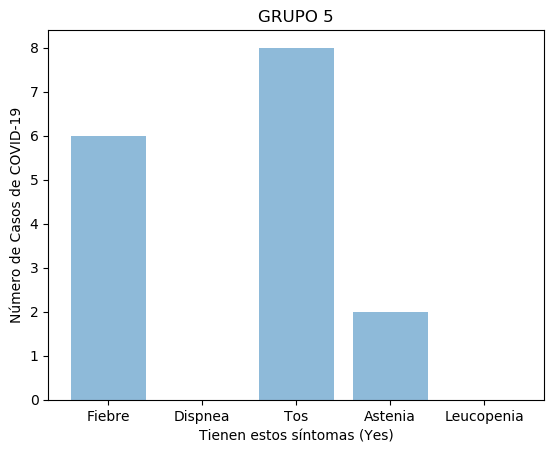

In [56]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Fiebre', 'Dispnea', 'Tos', 'Astenia', 'Leucopenia')
y_pos = np.arange(len(objects))
absolute_error = [g5fev[2], 0, g5cou[2], g5ast[2], 0]

plt.bar(y_pos, absolute_error, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Número de Casos de COVID-19')
plt.xlabel('Tienen estos síntomas (Yes)')
plt.title('GRUPO 5')

plt.show()

## Modelo de Machine Learning utilizando Regresión

<font size="4">El obejetivo del sistema es determinar si una persona en particular podría ser o no portadora del virus de acuerdo a una serie de atributos como sintomas de fiebre, congestión nasal o completamente ajenos la conición média como el riesgo de contagio en su zona o la exposición al virus.</font>

### Separando el Dataset para Training y para Test

In [6]:
# Modelo de Machine Learning Utilizando Regresion
listCol = list(df.columns)
yLab = []
xLab = listCol
yLab.append(xLab.pop(16))

x = DatasetPreprocesado[xLab]
y = DatasetPreprocesado[yLab]

# Dividiendo el dataframe en Test y Training
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [7]:
#Training
import numpy as np
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()

regressor.fit(X_train, y_train)
#El modelo de regresión intenta encontrar los coeficientes más óptimos para todos los atributos.
coeff_df = pd.DataFrame(regressor.coef_.flatten(), x.columns, columns=['Coefficient'])   
coeff_df

,Coefficient
Age,0.001249
Gender,-0.017250
Fever,0.016645
Dyspnea,-0.054567
Nasal,0.054692
Cough,0.033878
PO2,0.000724
CRP,0.090326
Astheniay,0.055011
Leukopenia,-0.047152


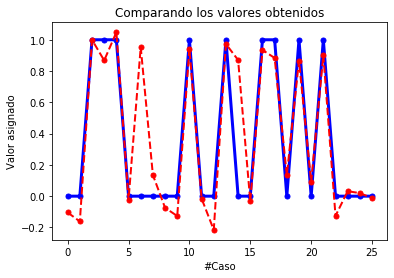

In [22]:
#0 = COVI-19 / 1 = Flu
#Predicciones
y_pred = regressor.predict(X_test)

#Comparacion Manual
dfPre = pd.DataFrame(np.array(y_test), columns = ['Real'])  
dfPre['Predecido'] = y_pred

num_pc= range(y_pred.shape[0])

import matplotlib.pyplot as plt
plt.plot(num_pc, dfPre['Real'], color='blue', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5, label = 'Valor Real')
plt.plot(num_pc, dfPre['Predecido'], color='red', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='red', markersize=5, label = 'Valor predecido')
plt.title('Comparando los valores obtenidos')
plt.xlabel('#Caso')
plt.ylabel('Valor asignado')
plt.show()

### Probando el modélo con datos arbitrarios 

In [180]:
#Crearemos un poco de datos para realizar una preccion
#0 = COVI-19 / 1 = Flu

import ctypes
ingreso = [45.0, 2.0, 1.0, 2.0, 1.0, 1.0, 15.0, 0.0, 1.0, 0.0, 1.0, 0.0, 27.0, 0.0, 0.0, 0.0]
test_data = pd.DataFrame([ingreso], columns = xLab)  
#print(tax)

def predecir_caso(dat):
    y_pred = regressor.predict(dat)
    print(str(y_pred[0]))
    text =' Prediccion: '+str(y_pred[0])
    title = 'Prediccion'
    return ctypes.windll.user32.MessageBoxW(0, text, title, 1)


predecir_caso(test_data)

[-0.18108562]


1